In [1]:
#영화리뷰를 사용한 텍스트 분류

import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd

import json 
import os

In [3]:
#데이터 불러오기
#네이버 영화 감성 분석 데이터 다운로드

#!git clone https://github.com/e9t/nsmc.git

Cloning into 'nsmc'...
remote: Enumerating objects: 14763, done.
remote: Total 14763 (delta 0), reused 0 (delta 0), pack-reused 14763
Receiving objects: 100% (14763/14763), 56.19 MiB | 21.58 MiB/s, done.
Resolving deltas: 100% (1749/1749), done.
Updating files: 100% (14737/14737), done.


In [3]:
dataset=pd.read_excel('data\Training.xlsx')
dataset.head()

,Unnamed: 0,연령,성별,상황키워드,신체질환,감정_대분류,감정_소분류,사람문장1,시스템문장1,사람문장2,시스템문장2,사람문장3,시스템문장3
0,1,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,일은 왜 해도 해도 끝이 없을까? 화가 난다.,많이 힘드시겠어요. 주위에 의논할 상대가 있나요?,그냥 내가 해결하는 게 나아. 남들한테 부담 주고 싶지도 않고.,혼자 해결하기로 했군요. 혼자서 해결하기 힘들면 주위에 의논할 사람을 찾아보세요.,NaN,NaN
1,2,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,이번 달에 또 급여가 깎였어! 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나.,급여가 줄어 속상하시겠어요. 월급이 줄어든 것을 어떻게 보완하실 건가요?,최대한 지출을 억제해야겠어. 월급이 줄어들었으니 고정지출을 줄일 수밖에 없을 것 같아.,월급이 줄어든 만큼 소비를 줄일 계획이군요.,NaN,NaN
2,3,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,회사에 신입이 들어왔는데 말투가 거슬려. 그런 애를 매일 봐야 한다고 생각하니까 스...,회사 동료 때문에 스트레스를 많이 받는 것 같아요. 문제 해결을 위해 어떤 노력을 ...,잘 안 맞는 사람이랑 억지로 잘 지내는 것보단 조금은 거리를 두고 예의를 갖춰서 대...,스트레스받지 않기 위해선 인간관계에 있어 약간의 거리를 두는 게 좋겠군요.,NaN,NaN
3,4,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜. 일도 많은 데 정말 분하고 ...,관련 없는 심부름을 모두 하게 되어서 노여우시군요. 어떤 것이 상황을 나아질 수 있...,직장 사람들과 솔직하게 이야기해보고 싶어. 일하는 데에 방해된다고.,직장 사람들과 이야기를 해 보겠다고 결심하셨군요.,NaN,NaN
4,5,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나.,무시하는 것 같은 태도에 화가 나셨군요. 상대방의 어떤 행동이 그런 감정을 유발하는...,상사인 나에게 먼저 인사하지 않아서 매일 내가 먼저 인사한다고!,항상 먼저 인사하게 되어 화가 나셨군요. 어떻게 하면 신입사원에게 화났음을 표현할 ...,NaN,NaN


In [4]:
dataset = dataset[['감정_대분류', '사람문장1']]
dataset.head()

,감정_대분류,사람문장1
0,분노,일은 왜 해도 해도 끝이 없을까? 화가 난다.
1,분노,이번 달에 또 급여가 깎였어! 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나.
2,분노,회사에 신입이 들어왔는데 말투가 거슬려. 그런 애를 매일 봐야 한다고 생각하니까 스...
3,분노,직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜. 일도 많은 데 정말 분하고 ...
4,분노,얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나.


In [5]:
dataset.columns=['label','document']
dataset.head()

,label,document
0,분노,일은 왜 해도 해도 끝이 없을까? 화가 난다.
1,분노,이번 달에 또 급여가 깎였어! 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나.
2,분노,회사에 신입이 들어왔는데 말투가 거슬려. 그런 애를 매일 봐야 한다고 생각하니까 스...
3,분노,직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜. 일도 많은 데 정말 분하고 ...
4,분노,얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나.


In [6]:
dataset['label'] = dataset['label'].replace(['분노', '기쁨', '불안', '당황', '슬픔', '상처'],[0, 1, 2, 3, 4, 5])

In [7]:
dataset['label'].unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51630 entries, 0 to 51629
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   label     51630 non-null  int64 
 1   document  51630 non-null  object
dtypes: int64(1), object(1)
memory usage: 806.8+ KB


In [10]:
# 중복 데이터 확인
dataset[dataset['document'].duplicated()]

,label,document
32758,0,남편 때문에 너무 속상해.
37076,3,나 걱정이 있어.
37675,1,오늘 감사한 일이 있었어.
37919,5,전부 언니는 공부를 잘한다고 언니한테만 잘해주고 나는 무시해.
38097,4,친구 집에 다녀왔어.
38533,4,나 좀 기분 나쁜 일이 있어.
38648,3,너무 힘들어.
38711,3,너무 외롭다.
38942,3,나 좀 잘못한 일이 있어.
39252,2,나 요즘 너무 힘들어.


In [12]:
dataset.drop_duplicates(subset = ['document'], inplace = True)

In [14]:
dataset['label'].value_counts()

2    9316
0    9157
5    9135
4    9119
3    8749
1    6125
Name: label, dtype: int64

In [15]:
# 입출력 데이터 분리
X_data = dataset['document']
y_data = dataset['label']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
TEST_SIZE = 0.2 # Train: Test = 8 :2 분리
RANDOM_STATE = 42
# strtify = True 일 경우, 데이터 분리 이전의 라벨별 분포 고려
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, 
                                                    test_size = TEST_SIZE, 
                                                    random_state = RANDOM_STATE, 
                                                    stratify = y_data)

In [22]:
y_test[:10]

35727    2
25392    0
30543    3
42979    3
31889    3
18640    3
5722     1
29093    0
39821    3
5264     5
Name: label, dtype: int64

In [21]:
X_test[:10]

35727     이번에 전학을 왔는데 그전 학교에서 날 괴롭히던 학생이 여기에도 소문을 낸 것 같아.
25392    자식들이 하도 안 찾아와서 재산을 기부한다고 했는데 그제야 찾아오더라. 너무 어이없어.
30543                                최근에 우리 부모님이 이혼을 하셨어.
42979          피시방에서 게임을 많이 해서 그런지 성적이 계속 떨어지는 것 같아 걱정이야.
31889                      학원에서 쉬는 시간마다 애들이 날 괴롭혀서 너무 지쳐.
18640         나는 왜 이렇게 일 처리 속도가 느릴까? 늘 하는 일인데도 손에 익지가 않아.
5722                          정말 힘든 프로젝트였어. 끝나서 날아갈 듯 기뻐.
29093                   코로나 때문에 손님이 없는데 임대료는 내야하고 정말 힘들어.
39821                                       살기 참 힘든 것 같아.
5264                             이번에도 또 돈을 빌렸어. 참 살기 힘드네.
Name: document, dtype: object

In [23]:
#데이터 전처리
# 1) 토큰화 (tokenizing)

def tokenizing(sentence):
    if isinstance(sentence, str):
        sentence=sentence.split(' ') #공백기준으로 자름
    else:
        sentence='' #노이즈 데이터 처리
    return sentence

In [24]:
train_data_list = X_train.apply(tokenizing)
test_data_list = X_test.apply(tokenizing)

In [25]:
train_data_list[:5]

45784                          [난, 지금, 면접만, 삼십, 번을, 떨어졌어.]
26558                                [이번에, 좋은, 회사에, 취직했어!]
43764    [언제부터, 몸이, 좋지, 않더니, 병이, 생긴, 걸, 알았어., 내, 인생은, 망...
12878        [엄마, 아빠는, 내가, 부모님이, 필요한, 순간에, 곁에, 있어주지를, 않아.]
9698            [아이들이, 부모가, 재산을, 남겨, 주지, 못한다고, 원망하지, 않을까?]
Name: document, dtype: object

In [26]:
#토크나이저 (tokenizer)

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [27]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(train_data_list)

In [28]:
#2) 정수인코딩(integer encoding)
# 문장 > 시퀀스 변환

train_data_ids=tokenizer.texts_to_sequences(train_data_list)
test_data_ids=tokenizer.texts_to_sequences(test_data_list)

In [29]:
train_data_ids[0]

[25, 88, 20590, 915, 4180, 293]

In [30]:
print(len(train_data_ids[0]))
print(len(train_data_ids[2]))

#> 엥 문장의 길이가 각기 다르넹

6
11


In [31]:
#3) 문장 패딩(padding)

train_data_padded=keras.preprocessing.sequence.pad_sequences(train_data_ids, value=0, padding='post', maxlen=50) #padding='post' 뒤에 붙이겠음
test_data_padded=keras.preprocessing.sequence.pad_sequences(test_data_ids, value=0, padding='post', maxlen=50)

In [32]:
print(train_data_padded[0].shape)
print(train_data_padded[0])
print(test_data_padded[0].shape)
print(test_data_padded[0])

(50,)
[   25    88 20590   915  4180   293     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0]
(50,)
[  61 2049  355  116   57 1060 5635 2327 2144    4    6    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


In [70]:
from keras.api._v2.keras import activations
# 4) 모델       
#입력 크기는 영화 리뷰 데이터 셋에서 적용된 어휘 사전의 크기입니다
#10000갸의 단어

vocab_size=10000
model=keras.Sequential()

model.add(keras.layers.Embedding(vocab_size, 16, input_shape=(50,))) #벡터화
#vocab_size 단어크기 16 원하는 벡터의 길이(타원)
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(16, activation='relu'))

model.add(keras.layers.Dense(6, activation='softmax'))

In [71]:
#5) 모델 학습

y_train[:5]

45784    5
26558    1
43764    5
12878    4
9698     5
Name: label, dtype: int64

In [72]:
# 환경설정

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [73]:
#학습

history = model.fit(train_data_padded,
          y_train,
          epochs=30,
          batch_size=32)

Epoch 1/30
1290/1290 [==============================] - 3s 2ms/step - loss: 1.6864 - accuracy: 0.2362
Epoch 2/30
1290/1290 [==============================] - 2s 2ms/step - loss: 1.5220 - accuracy: 0.3205
Epoch 3/30
1290/1290 [==============================] - 2s 2ms/step - loss: 1.4710 - accuracy: 0.3556
Epoch 4/30
1290/1290 [==============================] - 2s 2ms/step - loss: 1.3947 - accuracy: 0.4242
Epoch 5/30
1290/1290 [==============================] - 2s 2ms/step - loss: 1.2830 - accuracy: 0.4991
Epoch 6/30
1290/1290 [==============================] - 2s 2ms/step - loss: 1.2184 - accuracy: 0.5348
Epoch 7/30
1290/1290 [==============================] - 2s 2ms/step - loss: 1.1789 - accuracy: 0.5517
Epoch 8/30
1290/1290 [==============================] - 2s 2ms/step - loss: 1.1527 - accuracy: 0.5668
Epoch 9/30
1290/1290 [==============================] - 2s 2ms/step - loss: 1.1298 - accuracy: 0.5749
Epoch 10/30
1290/1290 [==============================] - 2s 2ms/step - loss: 1.109

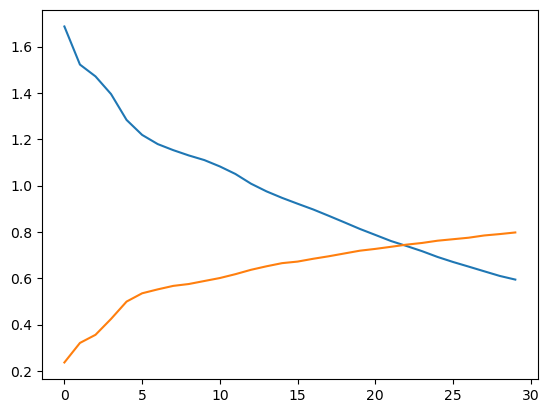

In [75]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])

In [76]:
#6) 모델 성능 평가
test_data_padded.shape

(10321, 50)

In [77]:
result=model.evaluate(test_data_padded, y_test, verbose=2)
print(result[1])

323/323 - 1s - loss: 2.2084 - accuracy: 0.4503 - 628ms/epoch - 2ms/step
0.4503439664840698


In [86]:
#모델 적용 > 추론
#추론할 리뷰 문장

sentence='맥도날드'

#토큰화
sentence=sentence.split(' ')

#정수 인코딩
sentence_ids=tokenizer.texts_to_sequences([sentence])

#페딩
sentence_padded=keras.preprocessing.sequence.pad_sequences(sentence_ids,
                                           value=0,
                                           padding='post',
                                           maxlen=50)

sentence_padded

array([[  50,   97,  611,  135, 2833,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0]])

In [87]:
result=model.predict(sentence_padded)
label_map = {0: '분노', 1: '기쁨', 2: '불안', 3: '당황', 4: '슬픔', 5: '상처'}
predicted_label = label_map[np.argmax(result)]
print(f'예측된 감정은 {predicted_label}이고, 확률은 {result[0][np.argmax(result)]:.2f}입니다.')

1/1 [==============================] - 0s 13ms/step
예측된 감정은 상처이고, 확률은 0.42입니다.


감성 분류 with RNN, LSTM

In [88]:
#1. 모델링 (LNN)

model=tf.keras.Sequential([
     #임베딩 레이어(embedding layer)
     tf.keras.layers.Embedding(vocab_size, 64),

     #RNN layer
     tf.keras.layers.SimpleRNN(16),

     #DENSE layer
     tf.keras.layers.Dense(16, activation='relu'),
     tf.keras.layers.Dense(6, activation='softmax')
                           
                           
                           ])

In [89]:
#2. 학습

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [92]:
history = model.fit(train_data_padded,
          y_train,
          epochs=50,
          batch_size=32)

Epoch 1/50
1290/1290 [==============================] - 22s 17ms/step - loss: 1.7091 - accuracy: 0.2552
Epoch 2/50
1290/1290 [==============================] - 22s 17ms/step - loss: 1.6021 - accuracy: 0.3228
Epoch 3/50
1290/1290 [==============================] - 23s 18ms/step - loss: 1.4696 - accuracy: 0.3961
Epoch 4/50
1290/1290 [==============================] - 22s 17ms/step - loss: 1.3311 - accuracy: 0.4657
Epoch 5/50
1290/1290 [==============================] - 22s 17ms/step - loss: 1.1955 - accuracy: 0.5323
Epoch 6/50
1290/1290 [==============================] - 22s 17ms/step - loss: 1.0819 - accuracy: 0.5881
Epoch 7/50
1290/1290 [==============================] - 22s 17ms/step - loss: 0.9779 - accuracy: 0.6374
Epoch 8/50
1290/1290 [==============================] - 23s 18ms/step - loss: 0.9008 - accuracy: 0.6716
Epoch 9/50
1290/1290 [==============================] - 23s 18ms/step - loss: 0.8167 - accuracy: 0.7085
Epoch 10/50
1290/1290 [==============================] - 23s 18m

In [93]:
#3 모델 성능 평가

result=model.evaluate(test_data_padded, y_test, verbose=2)
print(result[1])

323/323 - 2s - loss: 4.1142 - accuracy: 0.2763 - 2s/epoch - 5ms/step
0.27632981538772583


In [152]:
#4. 추론 (모델 적용)

sentence='우리 팀 참 좋아요!'

#토큰화
sentence=sentence.split(' ')

#정수 인코딩
sentence_ids=tokenizer.texts_to_sequences([sentence])

#페딩
sentence_padded=keras.preprocessing.sequence.pad_sequences(sentence_ids,
                                           value=0,
                                           padding='post',
                                           maxlen=50)

sentence_padded

array([[  18, 1353,  137,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0]])

In [153]:
result=model.predict(sentence_padded)
label_map = {0: '분노', 1: '기쁨', 2: '불안', 3: '당황', 4: '슬픔', 5: '상처'}
predicted_label = label_map[np.argmax(result)]
print(f'예측된 감정은 {predicted_label}이고, 확률은 {result[0][np.argmax(result)]:.2f}입니다.')

1/1 [==============================] - 0s 18ms/step
예측된 감정은 기쁨이고, 확률은 0.90입니다.
